In [2]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
n=100

In [4]:
x = torch.ones(n,4) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.7630,  1.0000,  1.0000,  1.0000],
        [-0.0061,  1.0000,  1.0000,  1.0000],
        [-0.8625,  1.0000,  1.0000,  1.0000],
        [ 0.1502,  1.0000,  1.0000,  1.0000],
        [-0.9639,  1.0000,  1.0000,  1.0000]])

In [5]:
x = torch.index_select(x, 1, torch.tensor([0,0,0,2]))

In [6]:
x[:,0].apply_(lambda a: 3*a**3)
x[:,1].apply_(lambda a: -2*a**2)
x[:5]

tensor([[-1.3326e+00, -1.1644e+00, -7.6301e-01,  1.0000e+00],
        [-6.8460e-07, -7.4686e-05, -6.1109e-03,  1.0000e+00],
        [-1.9247e+00, -1.4877e+00, -8.6248e-01,  1.0000e+00],
        [ 1.0163e-02, -4.5113e-02,  1.5019e-01,  1.0000e+00],
        [-2.6865e+00, -1.8581e+00, -9.6388e-01,  1.0000e+00]])

In [7]:
a = tensor(3.,1.,2.,4.); a

tensor([3., 1., 2., 4.])

In [8]:
y = x@a + (torch.rand(n) * 6)

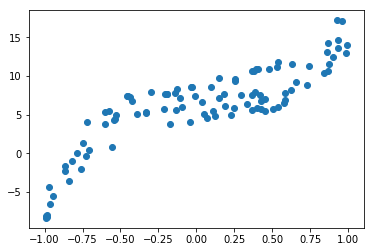

In [9]:
plt.scatter(x[:,2], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [10]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [11]:
A = tensor([[1.,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
B = tensor([[0.,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
C = tensor([[0.,0,0,0], [0,0,0,0], [0,0,1,0], [0,0,0,1]])
D = tensor([[0.,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,1]])

a = tensor(-1.,1,-1,3)

projectionMatrices = [A, B, C, D]

In [12]:
yHats = list(map(lambda projectionMatrix: x @ projectionMatrix @ a, projectionMatrices))
list(map(lambda yHat: mse(yHat, y), yHats))

[tensor(61.9085), tensor(47.1094), tensor(43.6283), tensor(37.8369)]

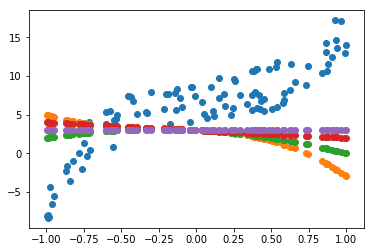

In [13]:
plt.scatter(x[:,2],y)

for yHat in yHats:
    plt.scatter(x[:,2],yHat)

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [17]:
projectionBuddies = list(map(lambda P: (P, nn.Parameter(P @ a.clone())), projectionMatrices)); 

In [15]:
def leastErrorUpdate(projectionMatrix, aHat):
    yHat = x @ aHat
    loss = mse(y, yHat)
    loss.backward()
    with torch.no_grad():
        aHat.sub_(lr * projectionMatrix @ aHat.grad)
        aHat.grad.zero_()
        

In [33]:
lr = 1e-1
for t in range(100):
    for (projectionMatrix, aHat) in projectionBuddies:
        leastErrorUpdate(projectionMatrix, aHat)


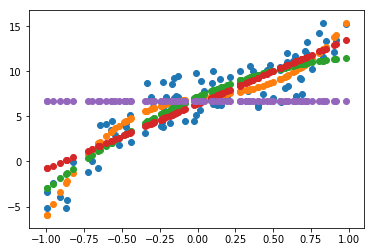

In [34]:
plt.scatter(x[:,2],y)
updatedYHats = list(map(lambda buddies: x @ buddies[1], projectionBuddies))

for yHat in updatedYHats:
    plt.scatter(x[:,2],yHat)

## Animate it!

/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


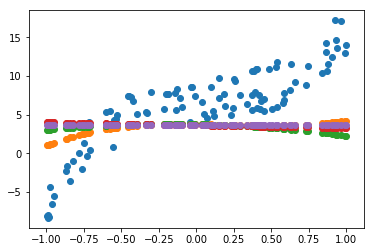

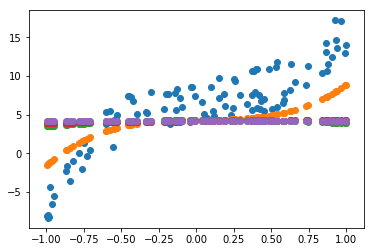

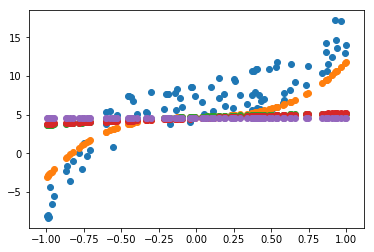

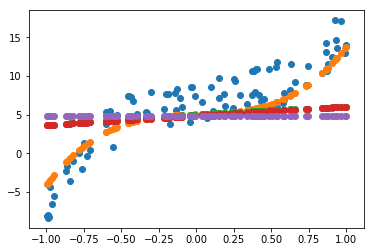

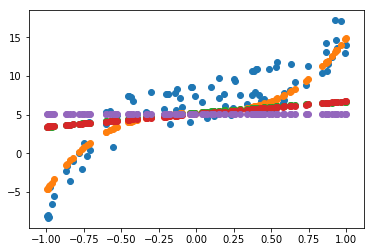

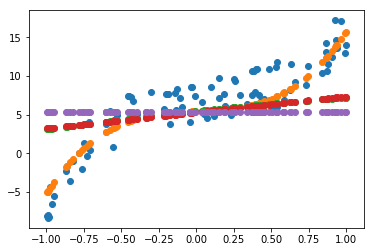

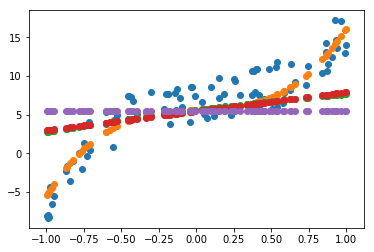

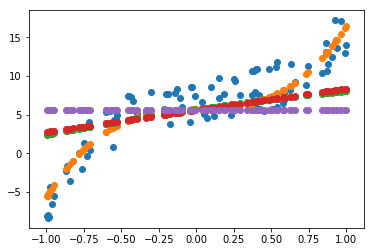

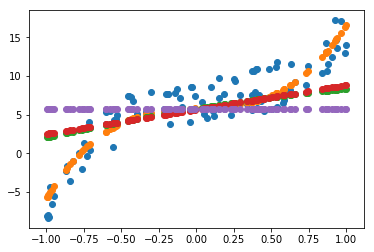

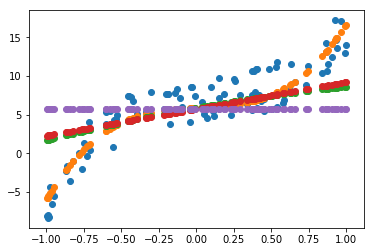

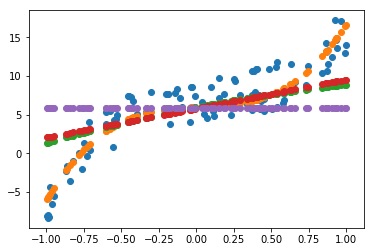

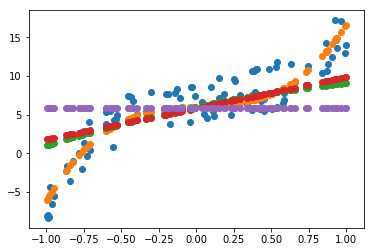

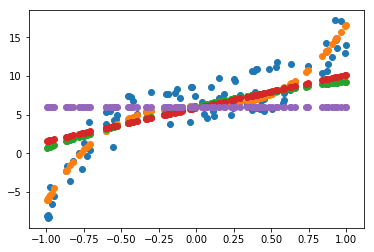

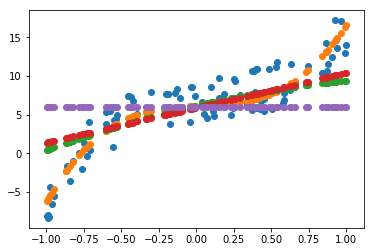

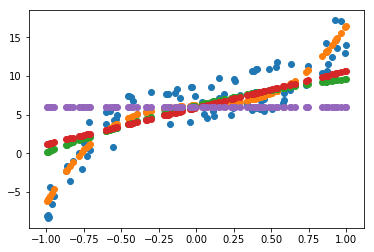

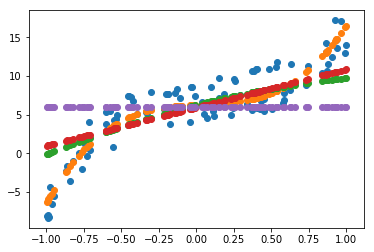

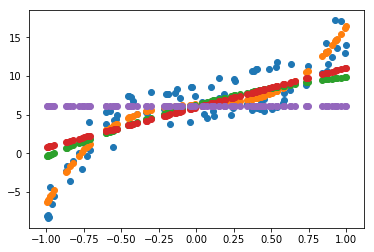

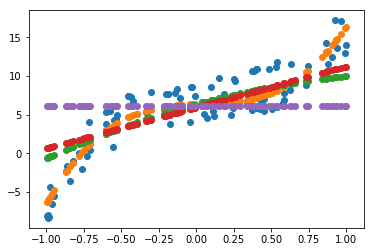

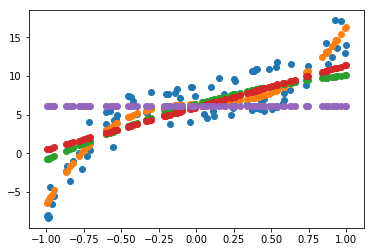

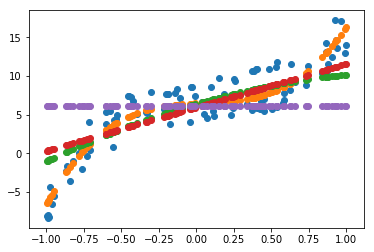

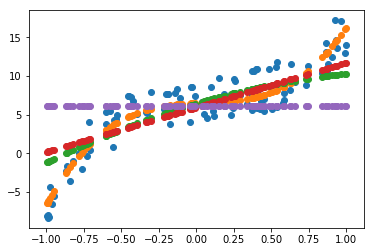

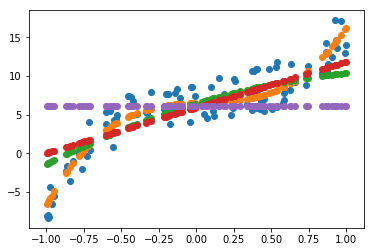

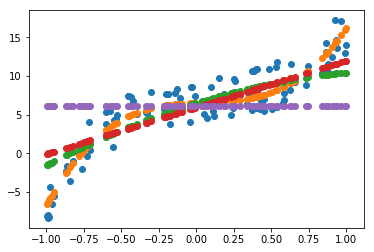

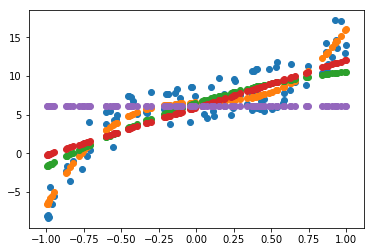

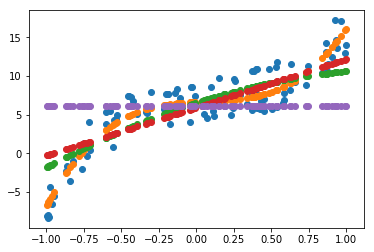

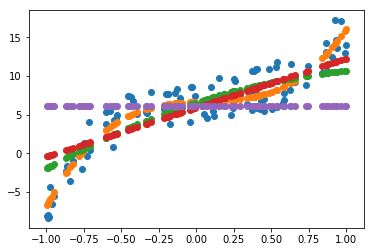

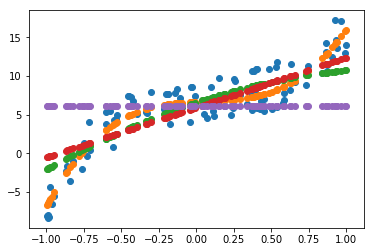

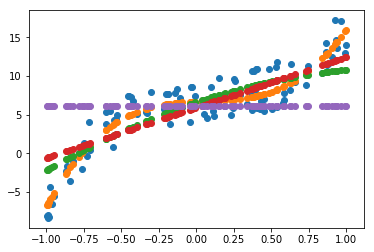

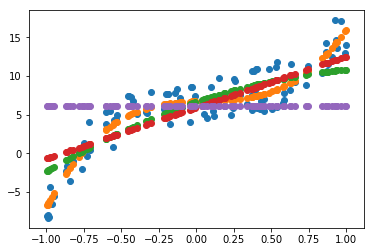

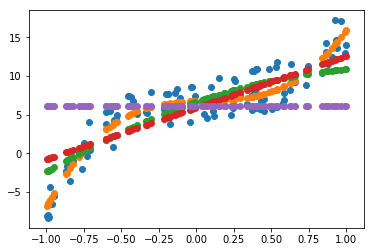

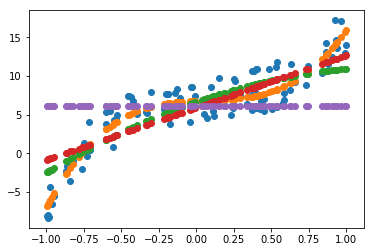

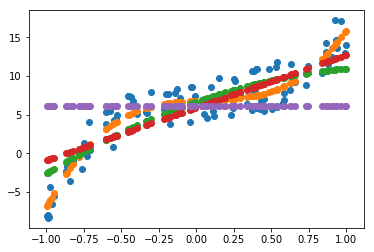

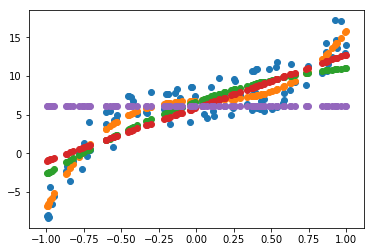

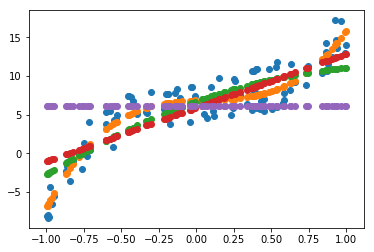

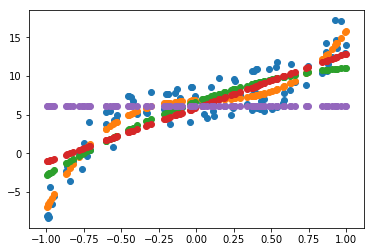

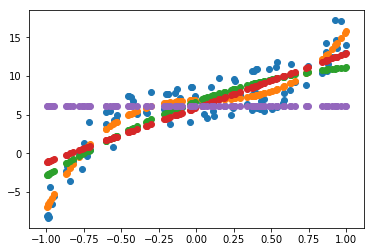

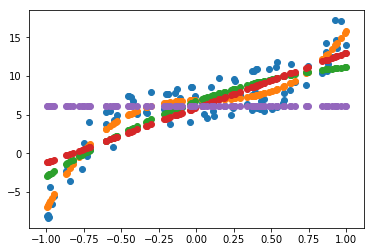

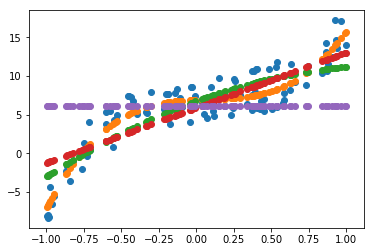

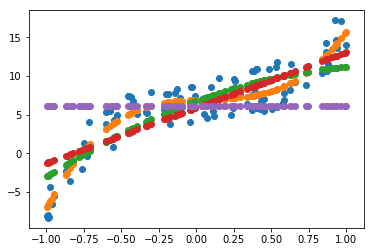

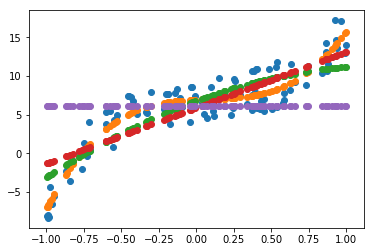

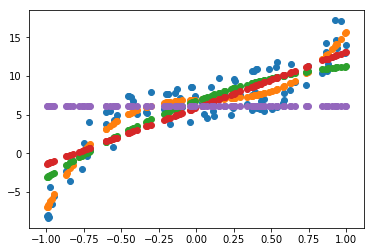

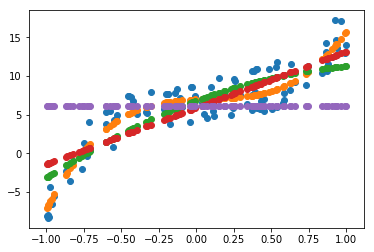

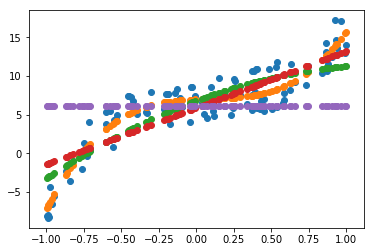

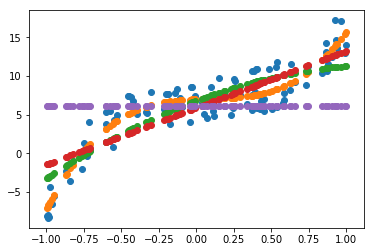

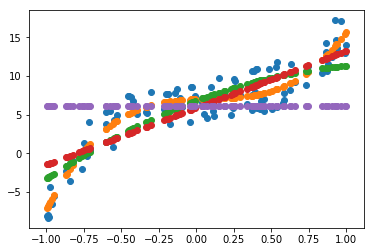

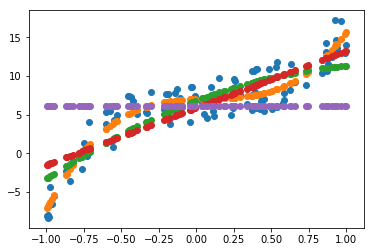

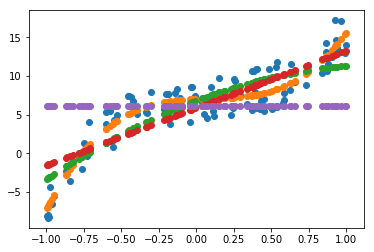

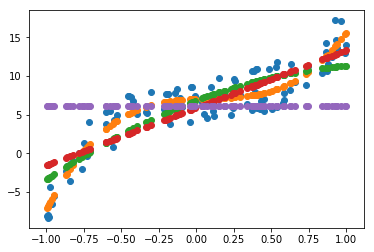

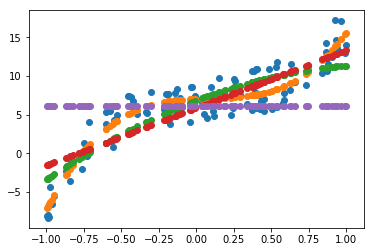

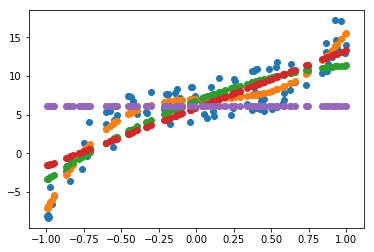

In [18]:
lr = 1e-1
for t in range(50):
    for (projectionMatrix, aHat) in projectionBuddies:
        leastErrorUpdate(projectionMatrix, aHat)
    figure = plt.figure(t)
    plt.scatter(x[:,2],y)
    updatedYHats = list(map(lambda buddies: x @ buddies[1], projectionBuddies))
    for yHat in updatedYHats:
        plt.scatter(x[:,2],yHat)
    figure.show()

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.